In [2]:
from typing import TypedDict
from langgraph.graph import StateGraph, START,END

In [3]:
class AgentState(TypedDict):
    number1:int
    operation:str
    number2: int
    finalnumber:int

In [4]:
def adder(state:AgentState)-> AgentState:
    """This node adds the 2 numbers"""
    state["finalnumber"]=state["number1"]+state["number2"]

    return state
def subtractor(state:AgentState)->AgentState:
    """This node subtracts the 2 numbers"""

    state["finalnumber"]=state["number1"]-state["number2"]
    return state

def decide_next_node(state:AgentState)-> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] =="+":
        return "addition_operation"

    elif state["operation"] =="-":
        return "subtraction_operation"

In [6]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router",lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }

)
graph.add_edge("add_node", END)
graph.add_edge("subtract_node", END)
app=graph.compile()

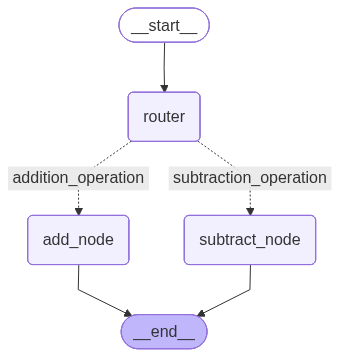

In [7]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [8]:
initial_state_1=AgentState(number1=10,operation="-", number2=5)
print(app.invoke(initial_state_1))

{'number1': 10, 'operation': '-', 'number2': 5, 'finalnumber': 5}


In [11]:
def adder(state:AgentState)-> AgentState:
    """This node adds the 2 numbers"""
    state["finalnumber"]=state["number1"]+state["number2"]

    return state
def subtractor(state:AgentState)->AgentState:
    """This node subtracts the 2 numbers"""

    state["finalnumber"]=state["number1"]-state["number2"]
    return state

def decide_next_node(state:AgentState)-> AgentState:
    """This node will select the next node of the graph"""

    if state["operation"] =="+":
        return "addition_operation"

    elif state["operation"] =="-":
        return "subtraction_operation"

In [26]:
graph = StateGraph(AgentState)
graph.add_node("add_node", adder)
graph.add_node("subtract_node", subtractor)
graph.add_node("router",lambda state:state)
graph.add_node("add_node2", adder)
graph.add_node("subtract_node2", subtractor)
graph.add_node("router2",lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    decide_next_node,
    {
        "addition_operation":"add_node",
        "subtraction_operation":"subtract_node"
    }

)
graph.add_edge("add_node", "router2")
graph.add_edge("subtract_node", "router2")



graph.add_conditional_edges(
    "router2",
    decide_next_node,
    {
        "addition_operation":"add_node2",
        "subtraction_operation":"subtract_node2"
    }

)
graph.add_edge("add_node2", END)
graph.add_edge("subtract_node2", END)
app=graph.compile()

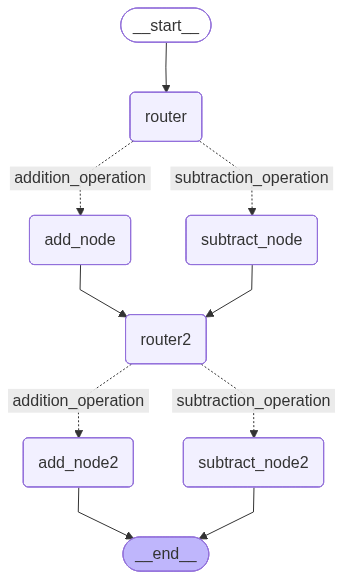

In [27]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))